In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("constituents-financials_csv.csv")
df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
print(df.isnull().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


In [4]:
df.dropna(inplace=True)  

In [6]:
print(df.isnull().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


In [7]:
print(df.describe())

             Price  Price/Earnings  Dividend Yield  Earnings/Share  \
count   495.000000      495.000000      495.000000      495.000000   
mean    104.106505       24.654303        1.901477        3.815192   
std     135.372594       40.767081        1.541039        5.529133   
min       2.820000     -251.530000        0.000000      -24.620000   
25%      46.355000       15.350000        0.795585        1.525000   
50%      73.920000       19.450000        1.790190        2.890000   
75%     116.735000       25.770000        2.797169        5.120000   
max    1806.060000      520.150000       12.661196       44.090000   

       52 Week Low  52 Week High    Market Cap        EBITDA  Price/Sales  \
count   495.000000    495.000000  4.950000e+02  4.950000e+02   495.000000   
mean    122.985808     83.812053  4.937665e+10  3.576406e+09     3.953316   
std     156.480433    106.497350  9.069162e+10  6.880742e+09     3.485055   
min       6.590000      2.800000  2.626102e+09 -5.067000e+09 

C:\Users\HP\AppData\Local\Temp\ipykernel_30200\323589294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Market Cap', data=df, palette="viridis")


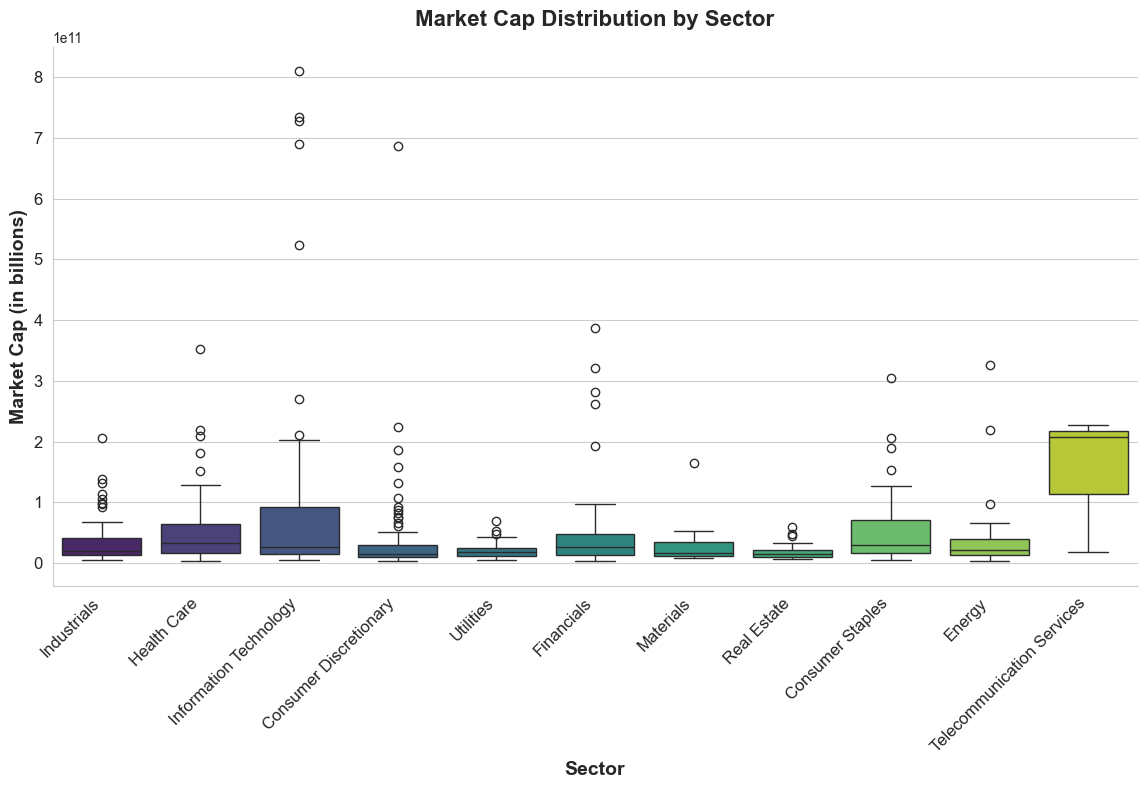

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sector', y='Market Cap', data=df, palette="viridis")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sector", fontsize=14, fontweight='bold')
plt.ylabel("Market Cap (in billions)", fontsize=14, fontweight='bold')
plt.title("Market Cap Distribution by Sector", fontsize=16, fontweight='bold', pad=15)

sns.despine()
plt.show()


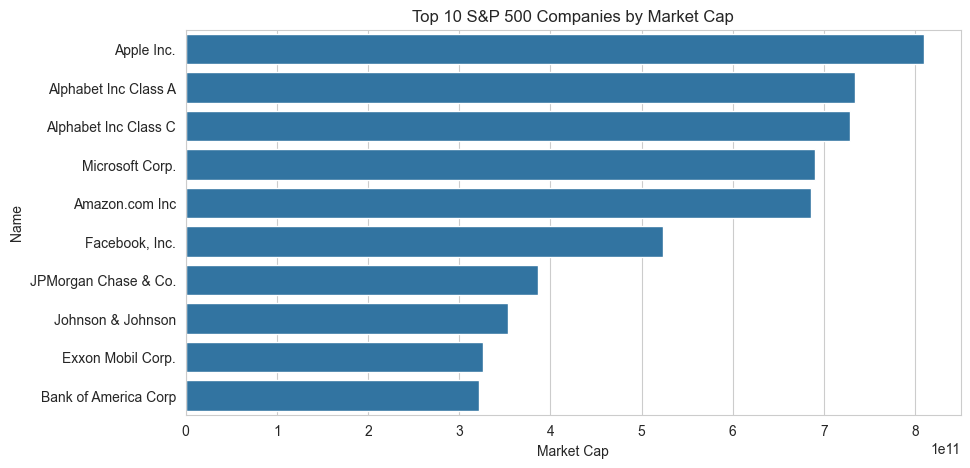

In [12]:
top_companies = df.nlargest(10, 'Market Cap')
plt.figure(figsize=(10,5))
sns.barplot(x='Market Cap', y='Name', data=top_companies)
plt.title("Top 10 S&P 500 Companies by Market Cap")
plt.show()